<a href="https://colab.research.google.com/github/SmittyB00p/7K6l06Ibrll2Q4f5/blob/main/dia_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia

https://github.com/nari-labs/dia/tree/main

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install git+https://github.com/nari-labs/dia.git

In [ ]:
!git clone https://github.com/nari-labs/dia.git

Cloning into 'dia'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 421 (delta 256), reused 178 (delta 178), pack-reused 129 (from 2)
Receiving objects: 100% (421/421), 740.32 KiB | 6.12 MiB/s, done.
Resolving deltas: 100% (272/272), done.


In [ ]:
import os, re, random, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%%capture
if os.path.exists('dia'):
  os.chdir('dia')
  print(f"Current working directory: {os.getcwd()}\n\n")

  !cd dia
  # !pip install dac -upgrade -quiet
  !python -m venv .venv
  !source .venv/bin/activate
  !pip install -e . -quiet
  # !python app.py

In [ ]:
def read_text_file(file_path) -> str():
    """
    Reads a text file and returns its contents as a string.

    Args:
        file_path (str): The path to the text file.

    Returns:
        str: The contents of the text file as a string.
    """

    with open(file_path, "r") as f:
        text = f.read()
        text = text.replace("\n", " ").replace("- ", "")
    return text

In [ ]:
os.getcwd()

'/content/dia'

In [ ]:
'''
this txt file has taken bible verses that are not complete sentences,
 such as verses ending in :, ;, etc. and put them into one line  of text so that each line
 of the txt file corresponds to one full sentence.
 Therefore, some of the 'verses' will be multiple verses whereas others will be just one verse.
'''

with open("../drive/MyDrive/genesis_verses.txt", "rt") as file:
  bible_verses = file.readlines()
  ## strip verses of white spaces
  bible_verses = [re.sub(r"\s", ' ', line) for line in bible_verses]
  ## strip verses of their verse numbers
  bible_verses = [re.sub(r'[0-9^\d+]', '', line).strip() for line in bible_verses]
  ## replace quotation marks ("") with no-space
  bible_verses = [re.sub(r"\"", '', line) for line in bible_verses]

In [ ]:
bible_verses[:10]

['Book of Genesis.',
 'Chapter One. In the beginning, when God created the heavens and the earth, the earth was a formless wasteland, and darkness covered the abyss, while a mighty wind swept over the waters.',
 'Then God said, Let there be light, and there was light.',
 'God saw how good the light was. God then separated the light from the darkness.',
 'God called the light day, and the darkness he called night. Thus evening came, and morning followed - the first day.',
 'Then God said, Let there be a dome in the middle of the waters, to separate one body of water from the other. And so it happened: God made the dome, and it separated the water above the dome from the water below it.',
 'God called the dome the sky. Evening came, and morning followed - the second day.',
 'Then God said, Let the water under the sky be gathered into a single basin, so that the dry land may appear. And so it happened: the water under the sky was gathered into its basin, and the dry land appeared.',
 'God

In [ ]:
'''
According to documentation on DIA's Github repository: https://github.com/nari-labs/dia?tab=readme-ov-file,
'Short input (corresponding to under 5s of audio) will sound unnatural' and
'Very long input (corresponding to over 20s of audio) will make the speech unnaturally fast.'

Timing audio myself to find 'characters-per-second', 1 second of audio roughly corresponds to 28 characters.
'''

print(f"28 tokens x 5 seconds = {28*5} tokens/ 5 seconds")
print(f"28 tokens x 10 seconds = {28*10} tokens/ 10 seconds")
print(f"28 tokens x 20 seconds = {28*20} tokens/ 20 seconds")

28 tokens x 5 seconds = 140 tokens/ 5 seconds
28 tokens x 10 seconds = 280 tokens/ 10 seconds
28 tokens x 20 seconds = 560 tokens/ 20 seconds


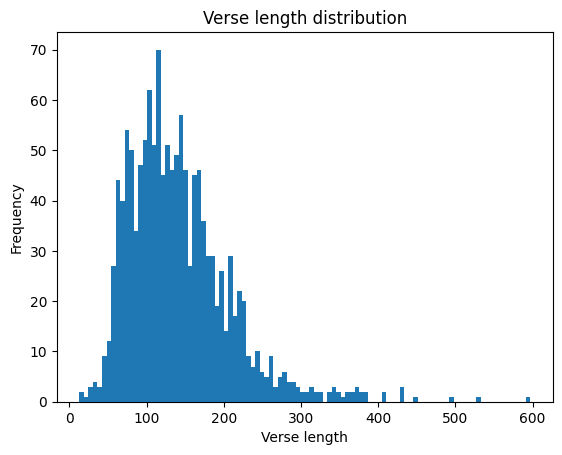

In [ ]:
# takes lines out that are less than 16 characters, i.e. Chapter ## or Book of ####.
# verses_greater_than_16 = [verse for verse in bible_verses if len(verse) >= 28]
verses = [verse for verse in bible_verses]
verses_length = [len(verse) for verse in verses]

plt.hist(verses_length, bins=100)
plt.xlabel("Verse length")
plt.ylabel("Frequency")
plt.title("Verse length distribution")
plt.show()

In [ ]:
verse_and_length = pd.DataFrame({"Verse": verses,
                                 "Length": verses_length,
                                })
verse_and_length.head()

,Verse,Length
0,Book of Genesis.,16
1,"Chapter One. In the beginning, when God create...",185
2,"Then God said, Let there be light, and there w...",55
3,God saw how good the light was. God then separ...,79
4,"God called the light day, and the darkness he ...",116


In [ ]:
description = verse_and_length.describe()
description

,Length
count,1328.000000
mean,141.826807
std,67.707949
min,13.000000
25%,95.000000
50%,130.000000
75%,174.000000
max,597.000000


In [ ]:
description.loc['50%'].tolist()[0] * 4

520.0

In [ ]:
joined_verses = [''.join(verses[i:i + 2]) for i in range(0, len(verses), 2)]
joined_verses = [verse for verse in joined_verses]

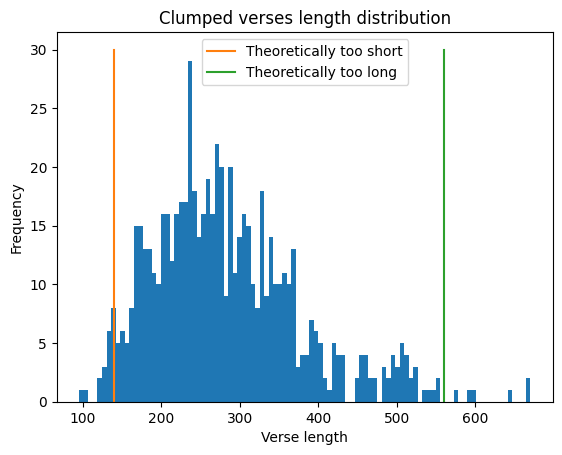

In [ ]:
clumped_verses = [verse for verse in joined_verses]
clumped_verses_length = [len(verse) for verse in clumped_verses]

plt.hist(clumped_verses_length, bins=100)
plt.plot((140, 140), (0, 30), label='Theoretically too short')
plt.plot((560, 560), (0, 30), label='Theoretically too long')
plt.xlabel("Verse length")
plt.ylabel("Frequency")
plt.title("Clumped verses length distribution")
plt.legend()
plt.show()

In [ ]:
clumped_verses_df = pd.DataFrame({
    "Clumped Verse": clumped_verses,
    "Length": clumped_verses_length,
})

clumped_verses_df.head(20)

,Clumped Verse,Length
0,"Book of Genesis.Chapter One. In the beginning,...",201
1,"Then God said, Let there be light, and there w...",134
2,"God called the light day, and the darkness he ...",331
3,"God called the dome the sky. Evening came, and...",289
4,"God called the dry land the earth, and the bas...",450
5,"Evening came, and morning followed - the third...",419
6,"God set them in the dome of the sky, to shed l...",221
7,"Then God said, Let the water teem with an abun...",483
8,"Then God said, Let the earth bring forth all k...",505
9,God created man in his image; in the divine im...,290


In [ ]:
clumped_verses_df.describe()

,Length
count,664.000000
mean,283.653614
std,96.302802
min,96.000000
25%,216.750000
50%,270.000000
75%,337.000000
max,670.000000


In [ ]:
import soundfile as sf
from dia.model import Dia
from IPython.display import Audio

model = Dia.from_pretrained("nari-labs/Dia-1.6B-0626", compute_dtype="float16")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.44G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [ ]:
## line by line audio generation
# verses = verses[:5]

# for i, verse in enumerate(verses):
#   output = model.generate(verse)
#   model.save_audio(f"verse_{i+1}.mp3", output)

In [ ]:
# for i in range(len(verses)):
#   display(Audio(f"verse_{i+1}.mp3", autoplay=False))

### Joined Verses Testing

* Mainly looking at the 'outliers' in the clumped verse length distribution graph from above

In [ ]:
text = f"[S1] {clumped_verses[0]}"

output = model.generate(text)

model.save_audio("genesis_1.mp3", output)

In [ ]:
Audio("genesis_1.mp3", autoplay=False)

In [ ]:
text = f"[S2] {clumped_verses[1]}"

output = model.generate(text)

model.save_audio("genesis_2.mp3", output)

In [ ]:
Audio("genesis_2.mp3", autoplay=False)

In [ ]:
text = f"[S1] {clumped_verses[12]}"

output = model.generate(text)

model.save_audio("genesis_13.mp3", output)

In [ ]:
Audio("genesis_13.mp3", autoplay=False)

In [ ]:
text = f"[S2] {clumped_verses[11]}"

output = model.generate(text)

model.save_audio("genesis_12.mp3", output)

In [ ]:
Audio("genesis_12.mp3", autoplay=False)

In [ ]:
Audio("../drive/MyDrive/project_4/audio_files/bible_verses_300.mp3", autoplay=False)

## Data engineering for fine-tuning

In [ ]:
os.getcwd()

'/content/dia'

In [ ]:
## path to store audio files
audio_files_path = "../drive/MyDrive/project_4/audio_files/"

In [ ]:
import math
speakers = ['[S1]', '[S2]']

half_clumped_length = math.ceil(len(clumped_verses)/2)

speakers = speakers*half_clumped_length

In [ ]:
##### uncomment the code block below if needing to generate the audio files

# for i, verse in enumerate(zip(clumped_verses, speakers)):
#   text = f"{verse[1]} {verse[0]}" ##[S1] or [S2] and then the text
#   output = model.generate(text)
#   model.save_audio(audio_files_path+f"bible_verses_{i+1}.mp3", output)

## Creating the json file that will be used for fine-tuning the Sesame model

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
json_contents = []

for i, verses in enumerate(clumped_verses):
  content = {"text": verses, "path": audio_files_path+f"bible_verses_{i+1}.mp3"}
  json_contents.append(content)

In [ ]:
json_contents[:5]

[{'text': 'Book of Genesis.Chapter One. In the beginning, when God created the heavens and the earth, the earth was a formless wasteland, and darkness covered the abyss, while a mighty wind swept over the waters.',
  'path': '../drive/MyDrive/project_4/audio_files/bible_verses_1.mp3'},
 {'text': 'Then God said, Let there be light, and there was light.God saw how good the light was. God then separated the light from the darkness.',
  'path': '../drive/MyDrive/project_4/audio_files/bible_verses_2.mp3'},
 {'text': 'God called the light day, and the darkness he called night. Thus evening came, and morning followed - the first day.Then God said, Let there be a dome in the middle of the waters, to separate one body of water from the other. And so it happened: God made the dome, and it separated the water above the dome from the water below it.',
  'path': '../drive/MyDrive/project_4/audio_files/bible_verses_3.mp3'},
 {'text': 'God called the dome the sky. Evening came, and morning followed -

In [ ]:
# with open('../drive/MyDrive/project_4/metadata.json', 'w') as f:
#   json.dump(json_contents, f, separators=(',', ':'), indent=2)

In [ ]:
# pd.read_json('../drive/MyDrive/project_4/metadata.json')
df = pd.read_json(path_or_buf='../drive/MyDrive/project_4/metadata.json')
df

,text,path
0,"Book of Genesis.Chapter One. In the beginning,...",../drive/MyDrive/project_4/audio_files/bible_v...
1,"Then God said, Let there be light, and there w...",../drive/MyDrive/project_4/audio_files/bible_v...
2,"God called the light day, and the darkness he ...",../drive/MyDrive/project_4/audio_files/bible_v...
3,"God called the dome the sky. Evening came, and...",../drive/MyDrive/project_4/audio_files/bible_v...
4,"God called the dry land the earth, and the bas...",../drive/MyDrive/project_4/audio_files/bible_v...
...,...,...
659,So they approached Joseph and said: Before you...,../drive/MyDrive/project_4/audio_files/bible_v...
660,But Joseph replied to them: Have no fear. Can ...,../drive/MyDrive/project_4/audio_files/bible_v...
661,Therefore have no fear. I will provide for you...,../drive/MyDrive/project_4/audio_files/bible_v...
662,He saw Ephraim's children to the third generat...,../drive/MyDrive/project_4/audio_files/bible_v...


In [ ]:
clumped_verses_df['Clumped Verse'].to_csv('../drive/MyDrive/project_4/clumped_verses.csv', index=False)